## <div align="center"> TUGAS LAB IS794 DEEP LEARNING </div>
### <div align="center"> WEEK [03] : [Keras and TensorFlow] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [27]:
# Imporr library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load dataset
training_df = pd.read_csv("car_details.csv")
training_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


<function matplotlib.pyplot.show(close=None, block=None)>

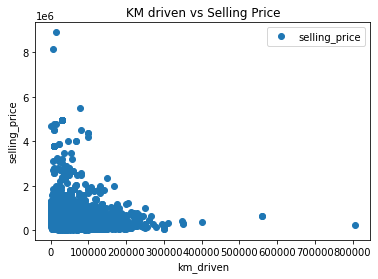

In [3]:
# Plotting feature (x) to target (y)
training_df.plot(x='km_driven', y='selling_price', style='o')
plt.title('KM driven vs Selling Price')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show

In [4]:
# Data Normalization
X = training_df['km_driven'].values.reshape(-1,1)
y = training_df['selling_price'].values.reshape(-1,1)

In [5]:
# Modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Menggunakan linearRegression untuk kasus regression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

#Melihat akurasi dari LinearRegression menggunakan data testing x dan y
accuracy = regressor.score(X_test, y_test)
print("accuracy : ", accuracy)

accuracy :  0.05265042004760356


In [6]:
# Multivariable linear regression
#multi variable linear Regression
X = training_df[['year', 'km_driven' ]]
y = training_df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Menggunakan linearRegression untuk kasus regression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

#Melihat akurasi dari LinearRegression menggunakan data testing x dan y
accuracy = regressor.score(X_test, y_test)
print("accuracy : ", accuracy)

accuracy :  0.18444582024171718


In [10]:
# Multi variable linear regression using encoder
def encode_data(feature_name):
    '''
    
    This function takes feature name as a parameter and returns mapping
    dictionary to replace(or map) categorical data with numerical data.
    
    '''
    mapping_dict = {}
    unique_values = list(training_df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    return mapping_dict

X = training_df[['year','fuel', 'km_driven','seller_type', 'transmission', 'owner']]
y = training_df['selling_price']
                 
training_df['fuel'].replace(encode_data('fuel'), inplace=True)
training_df['seller_type'].replace(encode_data('seller_type'), inplace=True)
training_df['transmission'].replace(encode_data('transmission'), inplace=True)
training_df['owner'].replace(encode_data('owner'), inplace=True)

# Import modul yang diperlukan
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Pisahkan data menjadi data pelatihan dan data pengujian (opsional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linear
model = LinearRegression()

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Prediksi harga jual menggunakan model
y_pred = model.predict(X_test)

# Evaluasi model menggunakan metrik akurasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 186947375734.51382
R-squared (R2) Score: 0.3873998083721826


## Challange

In [25]:
# Import modul yang diperlukan dari TensorFlow
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert the data to a Pandas DataFrame

df = pd.DataFrame(pd.read_csv("car_details.csv"))

# Encode categorical variables
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize numerical variables
scaler = StandardScaler()
df[['year', 'selling_price', 'km_driven']] = scaler.fit_transform(df[['year', 'selling_price', 'km_driven']])

# Split the data into training and testing sets
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_absolute_error

# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=["mae"])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Epoch 1/100
87/87 [==============================] - 1s 4ms/step - loss: 123.5540 - mae: 6.0264 - val_loss: 29.2555 - val_mae: 4.7394
Epoch 2/100
87/87 [==============================] - 0s 2ms/step - loss: 84.5189 - mae: 6.4119 - val_loss: 90.0309 - val_mae: 8.3759
Epoch 3/100
87/87 [==============================] - 0s 2ms/step - loss: 74.7643 - mae: 6.3273 - val_loss: 45.3982 - val_mae: 5.9077
Epoch 4/100
87/87 [==============================] - 0s 2ms/step - loss: 54.0201 - mae: 5.5222 - val_loss: 11.0595 - val_mae: 2.9814
Epoch 5/100
87/87 [==============================] - 0s 2ms/step - loss: 58.7613 - mae: 5.8277 - val_loss: 27.2448 - val_mae: 4.6544
Epoch 6/100
87/87 [==============================] - 0s 2ms/step - loss: 60.4074 - mae: 5.6735 - val_loss: 1.8837 - val_mae: 0.9455
Epoch 7/100
87/87 [==============================] - 0s 2ms/step - loss: 50.2494 - mae: 5.0871 - val_loss: 9.4265 - val_mae: 2.6159
Epoch 8/100
87/87 [==============================] - 0s 2ms/step - los

Epoch 63/100
87/87 [==============================] - 0s 2ms/step - loss: 1.6185 - mae: 0.6625 - val_loss: 0.5932 - val_mae: 0.3564
Epoch 64/100
87/87 [==============================] - 0s 2ms/step - loss: 0.8244 - mae: 0.6020 - val_loss: 0.8915 - val_mae: 0.4736
Epoch 65/100
87/87 [==============================] - 0s 2ms/step - loss: 0.8519 - mae: 0.5452 - val_loss: 0.6239 - val_mae: 0.3392
Epoch 66/100
87/87 [==============================] - 0s 1ms/step - loss: 0.7917 - mae: 0.5821 - val_loss: 1.8554 - val_mae: 1.1068
Epoch 67/100
87/87 [==============================] - 0s 2ms/step - loss: 0.7727 - mae: 0.5767 - val_loss: 2.8008 - val_mae: 1.4039
Epoch 68/100
87/87 [==============================] - 0s 2ms/step - loss: 0.8265 - mae: 0.5397 - val_loss: 1.2108 - val_mae: 0.8283
Epoch 69/100
87/87 [==============================] - 0s 2ms/step - loss: 0.7164 - mae: 0.5627 - val_loss: 0.6356 - val_mae: 0.3437
Epoch 70/100
87/87 [==============================] - 0s 2ms/step - loss: 0.

Apabila menggunakan neural network seperti yang di atas maka menghasilkan akurasi yang lebih baik. Bahkan lebih baik dibandingkan cara di dalam modul (yang Richard FW kerjakan)